<IPython.core.display.Javascript object>


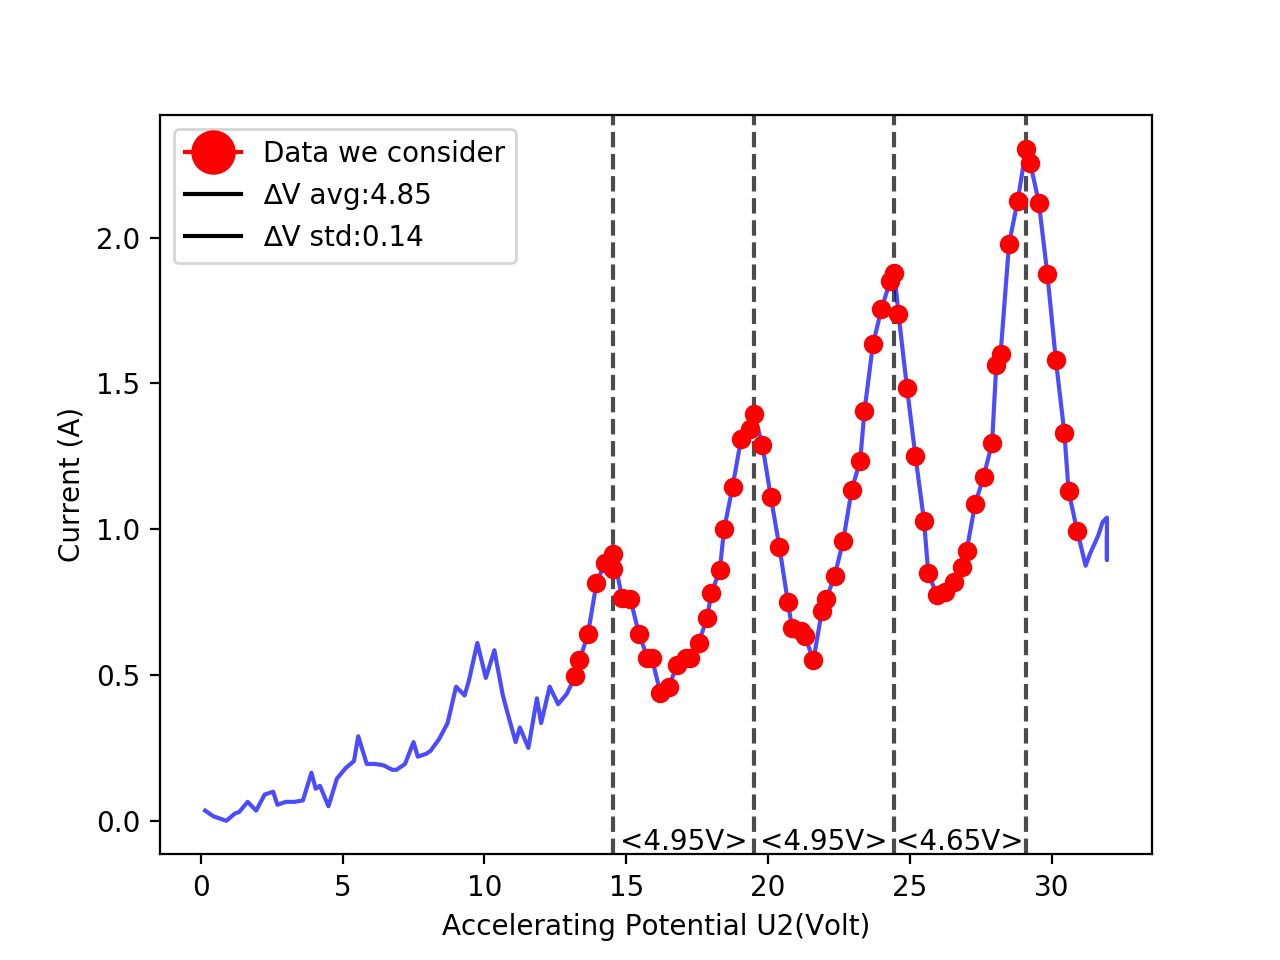

avg 4.85
std 0.14
('Mean:', 4.8500000000000005, 'StDEV:', 0.17320508075688587)


In [243]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.signal import argrelextrema
from numpy import *
import pylab
import pandas

colnames = ['A1', 'B1','C1','D1']
data = pandas.read_excel("u1-1.87 u3-1.27 T203.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
i=np.array(icc)
v=np.array(vcc)
ir=i[50:120]  # arrange where we get th data
vr=v[50:120]


a=argrelextrema(ir, np.greater)[0]

t=0
delta=[]
pp=[]
for k in range(len(a)-1):
    t=vr[a[k+1]]-vr[a[k]]
    if t>4:     #to not consider, dummy local maxima because of noise
        delta.append((vr[a[k+1]]-vr[a[k]]))
        pp.append(vr[a[k]])
        pp.append(vr[a[k+1]])
        
pp=list(dict.fromkeys(pp))
for h in range(len(pp)):  
    plt.axvline(x=pp[h],ls = "--", color='black', alpha=0.7)
for p in range(len(delta)):
    xx=(pp[p+1]+pp[p])/2
    plt.text(xx,-0.1, '<'+str(round(delta[p],2))+'V>',horizontalalignment='center')
    



    


data = mlines.Line2D([], [], color='red', marker='o',markersize=15, label='Data we consider')
data2 = mlines.Line2D([], [], color='black', marker=',',markersize=15,label= '∆V avg:'+str(round(np.mean(delta),2)))
data3 = mlines.Line2D([], [], color='black', marker=',',markersize=15,label= '∆V std:'+str(round(np.std(delta),2)))
plt.legend(handles=[data,data2,data3])
plt.xlabel('Accelerating Potential U2(Volt)')
plt.ylabel('Current (A)')
plt.plot(v,i,'b-', alpha=0.7)
plt.plot(vr,ir,'ro')
plt.show()
print('avg',round(np.mean(delta),2))
print('std',round(np.std(delta),2))


In [241]:
avg=[4.85,4.85,4.8,5.0,4.99,5.05,4.9,5.0,4.88,4.88,5.0,4.91,4.9]
std=[0.14,0.14,0.12,0.07,0.19,0.19,0.07,0.25,0.17,0.17,0.07,0.16,0.19]

def WA(m,s): #algorithm of Weighted average
    wau=0
    wad=0
    for i in range(len(m)):
        wau+= m[i]/(s[i]**2)
    for h in range(len(m)):
        wad+= 1/(s[h]**2)
    return wau/wad


def WAS(s): #algorithm of uncertainty of wighted average
    was=0
    for i in range(len(s)):
        was+= (s[i]**2)
    return np.sqrt(was/(len(s)**2))

print('weighted average:',round(WA(avg,std),2))
print('uncertainty:',round(WAS(std),2))

weighted average: 4.94
uncertainty: 0.04


In [1]:
from lmfit import Model

ModuleNotFoundError: No module named 'lmfit'